1. Используйте **наборы данных для классификации и регрессии**, с помощью которых вы выполняли ЛР1-ЛР4.
2. С помощью классов библиотеки sklearn выполните понижение размерности (**размерность выберите сами, можно разные**) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. **Выберите две модели** (одна - для регрессии и другая - для классификации).
4. Обучите выбранные модели с использованием данных в пространстве низкой размерности - **используйте результаты выполнения пункта 3** (не забудьте, что понижать нужно и X_train и X_test - проще всего понижать X). **Сделайте вывод** о том, какие методы понижения размерности лучше всего подходят для ваших данных.
5. **Самостоятельно реализуйте алгоритм PCA**. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). **Выполните визуализацию данных** (точки на плоскости).
6. Попробуйте выполнить **кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans** из ЛР6.
7. Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. **Важно: модель должна быть реализована вами, не sklearn!** Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.


In [8]:
import sys
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning/models//Downsizing")
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning/models//Clusterisation")
sys.path.insert(0, "C://Users//MSI//Desktop//OmSTU//MachineLearning/models//Regression")
from pcamodel import PCAModel
from kmeansmodel import KMeansModel
from linear_regression import LinearRegressionModel
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

1. Используйте **наборы данных для классификации и регрессии**, с помощью которых вы выполняли ЛР1-ЛР4.

In [9]:
classification_data = pd.read_csv("../data/card_transdata.csv").sample(5000)
regression_data = pd.read_csv("../data/kc_house_data_preprocessed.csv").drop(columns=["Unnamed: 0"]).sample(5000)

In [10]:
regression_Y = regression_data['price']
regression_X = regression_data.drop(columns=['price'])

In [11]:
classification_Y = classification_data['fraud']
classification_X = classification_data.drop(columns=['fraud'])

2. С помощью классов библиотеки sklearn выполните понижение размерности (**размерность выберите сами, можно разные**) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).

In [12]:
classification_X = StandardScaler().fit_transform(classification_X)
regression_X = StandardScaler().fit_transform(regression_X)

In [13]:
print(f"classification_shape = { classification_X.shape }")
print(f"regrssion_shape = { regression_X.shape }")

classification_shape = (5000, 7)
regrssion_shape = (5000, 21)


In [14]:
vt = VarianceThreshold(1)
X_vt_classify = vt.fit_transform(classification_X)
X_vt_classify.shape

(5000, 3)

In [15]:
vt = VarianceThreshold(1)
X_vt_regression = vt.fit_transform(regression_X)
X_vt_regression.shape

(5000, 4)

In [16]:
skb = SelectKBest(k=3)
X_skb_classify = skb.fit_transform(classification_X, classification_Y)
X_skb_classify.shape

(5000, 3)

In [17]:
skb = SelectKBest(k=5)
X_skb_regression = skb.fit_transform(regression_X, regression_Y)
X_skb_regression.shape

(5000, 5)

In [18]:
tree = DecisionTreeClassifier().fit(classification_X, classification_Y)
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(classification_X, classification_Y)
X_rfe_classify = rfe.transform(classification_X)
X_rfe_classify.shape

(5000, 4)

In [19]:
tree = DecisionTreeRegressor().fit(regression_X, regression_Y)
rfe = RFE(estimator=tree, n_features_to_select=5, step=1).fit(regression_X, regression_Y)
X_rfe_regression = rfe.transform(regression_X)
X_rfe_regression.shape

(5000, 5)

In [20]:
pca = PCA(n_components=3)
X_pca_classify = pca.fit_transform(classification_X, classification_Y)
X_pca_classify.shape

(5000, 3)

In [21]:
pca = PCA(n_components=5)
X_pca_regression = pca.fit_transform(regression_X, regression_Y)
X_pca_regression.shape

(5000, 5)

In [22]:
tsne = TSNE(n_components=2)
X_tsne_classify = tsne.fit_transform(classification_X)
X_tsne_classify.shape

(5000, 2)

In [23]:
tsne = TSNE(n_components=2)
X_tsne_regression = tsne.fit_transform(regression_X)
X_tsne_regression.shape

(5000, 2)

In [24]:
isomap = Isomap(n_components=5)
X_isomap_classify = isomap.fit_transform(classification_X)
X_isomap_classify.shape

c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_ma

(5000, 5)

In [25]:
isomap = Isomap(n_components=2)
X_isomap_regression = isomap.fit_transform(regression_X)
X_isomap_regression.shape

c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(5000, 2)

3. **Выберите две модели** (одна - для регрессии и другая - для классификации).

In [26]:
def regression_check(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
    lr = LinearRegression().fit(X_train, y_train)
    return mean_absolute_error(y_test, lr.predict(X_test))

In [27]:
def classify_check(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
    lr = GaussianNB().fit(X_train, y_train)
    print(classification_report(y_test, lr.predict(X_test)))

4. Обучите выбранные модели с использованием данных в пространстве низкой размерности - **используйте результаты выполнения пункта 3** (не забудьте, что понижать нужно и X_train и X_test - проще всего понижать X). **Сделайте вывод** о том, какие методы понижения размерности лучше всего подходят для ваших данных.

In [28]:
print(f"Original data:\t { regression_check(regression_X, regression_Y) }")
print(f"VarianceT:\t { regression_check(X_vt_regression, regression_Y) }")
print(f"SelectKBest:\t { regression_check(X_skb_regression, regression_Y) }")
print(f"RFE:\t\t { regression_check(X_rfe_regression, regression_Y) }")
print(f"PCA:\t\t { regression_check(X_pca_regression, regression_Y) }")
print(f"TSNE:\t\t { regression_check(X_tsne_regression, regression_Y) }")
print(f"Isomap:\t\t { regression_check(X_isomap_regression, regression_Y) }")

Original data:	 130444.1781319766
VarianceT:	 176196.8786391855
SelectKBest:	 165470.4399819954
RFE:		 145759.62975327362
PCA:		 158582.60517659443
TSNE:		 241228.6925378788
Isomap:		 242711.3401661965


In [29]:
print("Original data")
classify_check(classification_X, classification_Y)

Original data
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61      1501
         1.0       0.15      1.00      0.26       149

    accuracy                           0.49      1650
   macro avg       0.58      0.72      0.44      1650
weighted avg       0.92      0.49      0.58      1650



In [30]:
print("VT")
classify_check(X_vt_classify, classification_Y)

VT
              precision    recall  f1-score   support

         0.0       1.00      0.12      0.21      1501
         1.0       0.10      1.00      0.18       149

    accuracy                           0.20      1650
   macro avg       0.55      0.56      0.20      1650
weighted avg       0.92      0.20      0.21      1650



In [31]:
print("SKB")
classify_check(X_skb_classify, classification_Y)

SKB
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1501
         1.0       0.76      0.28      0.40       149

    accuracy                           0.93      1650
   macro avg       0.85      0.63      0.68      1650
weighted avg       0.92      0.93      0.91      1650



In [32]:
print("RFE")
classify_check(X_rfe_classify, classification_Y)

RFE
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61      1501
         1.0       0.15      1.00      0.26       149

    accuracy                           0.49      1650
   macro avg       0.57      0.72      0.43      1650
weighted avg       0.92      0.49      0.58      1650



In [33]:
print("PCA")
classify_check(X_pca_classify, classification_Y)

PCA
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96      1501
         1.0       0.67      0.20      0.31       149

    accuracy                           0.92      1650
   macro avg       0.80      0.60      0.63      1650
weighted avg       0.90      0.92      0.90      1650



In [34]:
print("TSNE")
classify_check(X_tsne_classify, classification_Y)

TSNE
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1501
         1.0       0.00      0.00      0.00       149

    accuracy                           0.91      1650
   macro avg       0.45      0.50      0.48      1650
weighted avg       0.83      0.91      0.87      1650



c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [35]:
print("Isomax")
classify_check(X_isomap_classify, classification_Y)

Isomax
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1501
         1.0       0.00      0.00      0.00       149

    accuracy                           0.91      1650
   macro avg       0.45      0.50      0.48      1650
weighted avg       0.83      0.91      0.87      1650



c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI\Desktop\OmSTU\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

5. **Самостоятельно реализуйте алгоритм PCA**. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). **Выполните визуализацию данных** (точки на плоскости).

In [36]:
pcamodel = PCAModel(n_components=2).fit_transform(pd.DataFrame(classification_X))
print(pcamodel.shape)

(5000, 2)


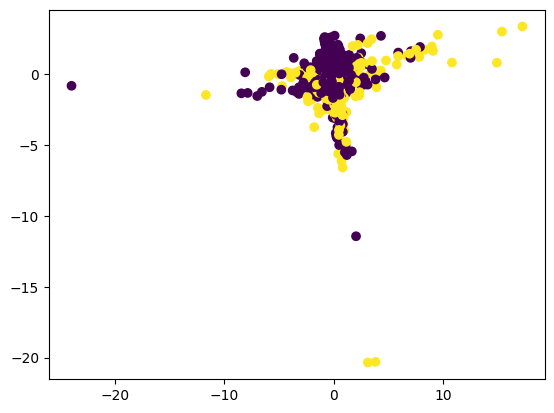

In [37]:
plt.scatter(pcamodel[:,0], pcamodel[:,1], c=classification_Y)

6. Попробуйте выполнить **кластеризацию преобразованных в пункте 5 данных с помощью вашей реализации алгоритма KMeans** из ЛР6.

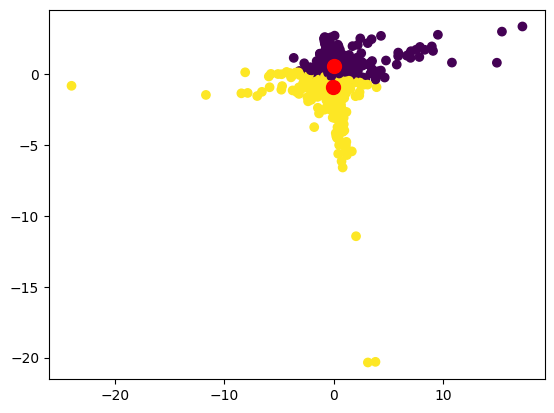

In [38]:
kmm = KMeansModel(n_clusters=2, n_features=2)
kmm.fit(pcamodel)

plt.scatter(pcamodel[:,0], pcamodel[:,1], c=kmm.labels_)
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], s=100, c='red')

7. Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. **Важно: модель должна быть реализована вами, не sklearn!** Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.

In [39]:
lrm = LinearRegressionModel(l_rate=1e-11, n_iter=10000)
lrm.fit(regression_X, regression_Y)
coefs = { regression_data.columns[i] : lrm.coef[i] for i in range(len(lrm.coef)) }

In [44]:
dict(sorted(coefs.items(), key=lambda item: item[1], reverse=True))

{'sqft_lot': 0.847316131734956,
 'zipcode': 0.8362748169966762,
 'condition': 0.8188298380271508,
 'yr_renovated': 0.8022788577958377,
 'yr_built': 0.6909936873233123,
 'sqft_living': 0.6802313238677108,
 'month': 0.5366502316966425,
 'floors': 0.4903692199494759,
 'lat': 0.44088877480230887,
 'sqft_above': 0.4387619216816815,
 'waterfront': 0.35618871697029647,
 'day': 0.31623684880034375,
 'bedrooms': 0.2910411336880706,
 'price': 0.25556880908882545,
 'long': 0.24674426453084378,
 'sqft_living15': 0.18997124869734072,
 'sqft_basement': 0.13699867263681287,
 'year': 0.1252691053996999,
 'bathrooms': 0.09859105800274943,
 'grade': 0.06494861380381466,
 'view': 0.042240799612970226}